In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from adjustText import adjust_text
import glob
import os


PREFIX = 'figures/Fig3A.'
METADATA = '../../manuscript-intermediate-processing/data/metadata/metadata.tm.txt'
GTEX_PREPROCESSING_DIR = '/net/topmed11/working/porchard/gtex-preprocessing'
TRANS_EQTL_TOP = glob.glob('../../manuscript-intermediate-processing/data/scan-results/joint/trans-eqtl/maf005/trans-top/*')
TRANS_SQTL_TOP = glob.glob('../../manuscript-intermediate-processing/data/scan-results/joint/trans-sqtl/maf005/trans-top/*')

In [ ]:
metadata = pd.read_csv(METADATA, sep='\t')
topmed_sample_sizes = metadata[metadata.used_for_scan].groupby('tissue').size().to_dict()

{'Lung': 1291,
 'Monocyte': 352,
 'Nasal_epithelial': 355,
 'PBMC': 1265,
 'T_cell': 368,
 'Whole_blood': 6454}

In [3]:
trans_eqtl = pd.concat([pd.read_csv(f, sep='\t').assign(tissue=os.path.basename(f).split('.')[0]) for f in TRANS_EQTL_TOP])
trans_eqtl.head()

,variant_id,phenotype_id,pval,b,b_se,r2,af,gene_mappability,gene_crossmaps_to_gene_near_variant,biotype,...,variant_chr,beta_shape1,beta_shape2,true_df,pval_true_df,pval_perm,pval_beta,pval_beta_no_zero,qvalue,tissue
0,chr14_83387951_A_T,ENSG00000000003.14,7.924750e-06,0.101930,0.022799,0.003120,0.190889,0.958185,False,protein_coding,...,chr14,1.009213,1.001703e+06,6071.524158,1.325706e-05,1.000000,9.999982e-01,9.999982e-01,9.999999e-01,Whole_blood
1,chr7_132431526_AG_A,ENSG00000000419.12,3.256160e-07,-0.144682,0.028295,0.004078,0.119538,1.000000,False,protein_coding,...,chr7,1.007563,1.022782e+06,6079.559490,6.231133e-07,0.469577,4.675975e-01,4.675975e-01,9.999999e-01,Whole_blood
2,chrX_26802742_G_A,ENSG00000000457.14,3.075770e-06,0.076452,0.016371,0.003403,0.657887,0.967695,False,protein_coding,...,chrX,1.005841,9.795177e+05,6086.276059,5.241570e-06,0.994150,9.940261e-01,9.940261e-01,9.999999e-01,Whole_blood
3,chr4_106906657_G_A,ENSG00000000460.17,3.760130e-07,-0.125686,0.024712,0.004034,0.155330,0.973241,False,protein_coding,...,chr4,1.005841,9.795177e+05,6086.276059,7.047652e-07,0.496775,4.957646e-01,4.957646e-01,9.999999e-01,Whole_blood
4,chr7_50330658_C_T,ENSG00000000938.13,3.503050e-25,-0.234596,0.022533,0.016690,0.235203,0.999762,False,protein_coding,...,chr7,1.005841,9.795177e+05,6086.276059,4.468785e-24,0.000050,3.457262e-18,3.457262e-18,1.392881e-16,Whole_blood


In [4]:
trans_sqtl = pd.concat([pd.read_csv(f, sep='\t').assign(tissue=os.path.basename(f).split('.')[0]) for f in TRANS_SQTL_TOP])
trans_sqtl.head()

,variant_id,phenotype_id,pval,b,b_se,r2,af,gene_mappability,gene_crossmaps_to_gene_near_variant,biotype,...,true_df,pval_true_df,pval_perm,pval_beta,pval_beta_no_zero,phenotypes_tested_for_gene,pval_beta_corrected_across_phenotypes,pval_beta_corrected_across_phenotypes_no_zero,qvalue,tissue
0,chr13_37537009_G_A,chr20:50945762:50945847:clu_27784_-:ENSG000000...,8.573320e-08,-0.094409,0.017611,0.004453,0.550356,1.000000,False,protein_coding,...,6169.109398,1.546737e-07,0.160642,0.159640,0.159640,10,0.824349,0.824349,1.0,Whole_blood
1,chr7_10451433_T_C,chr1:169854964:169859041:clu_1819_-:ENSG000000...,1.516080e-06,0.093894,0.019506,0.003593,0.710335,0.967695,False,protein_coding,...,6177.851754,2.408846e-06,0.929504,0.928483,0.928483,9,1.000000,1.000000,1.0,Whole_blood
2,chr2_50996988_A_G,chr1:169850345:169851817:clu_3994_+:ENSG000000...,1.081620e-07,-0.125166,0.023534,0.004383,0.186319,0.973241,False,protein_coding,...,6177.851754,1.895948e-07,0.186041,0.185696,0.185696,7,0.762586,0.762586,1.0,Whole_blood
3,chr14_30764453_A_G,chr1:27625151:27635065:clu_530_-:ENSG000000009...,4.169080e-09,-0.121326,0.020614,0.005362,0.705841,0.999762,False,protein_coding,...,6177.851754,8.254313e-09,0.008450,0.008733,0.008733,19,0.153510,0.153510,1.0,Whole_blood
4,chr6_19726094_A_T,chr1:196690239:196701318:clu_4126_+:ENSG000000...,4.081740e-07,0.127794,0.025204,0.003985,0.150449,0.955029,False,protein_coding,...,6177.851754,6.809344e-07,0.527324,0.524024,0.524024,1,0.524024,0.524024,1.0,Whole_blood


In [5]:
# plot sample size vs number significant
# including for GTEx
gtex_trans_eqtl = pd.read_csv(os.path.join(GTEX_PREPROCESSING_DIR, 'data/gtex/GTEx_Analysis_v8_trans_eGenes_fdr05.txt'), sep='\t')
gtex_trans_eqtl.variant_id = gtex_trans_eqtl.variant_id.str.replace('_b38', '')
gtex_trans_eqtl_counts = gtex_trans_eqtl.groupby('tissue_id').size().rename('n_trans').reset_index()

gtex_trans_sqtl = pd.read_csv(os.path.join(GTEX_PREPROCESSING_DIR, 'data/gtex/GTEx_Analysis_v8_trans_sGenes_fdr05.txt'), sep='\t')
gtex_trans_sqtl.variant_id = gtex_trans_sqtl.variant_id.str.replace('_b38', '')
gtex_trans_sqtl_counts = gtex_trans_sqtl.groupby('tissue_id').size().rename('n_trans').reset_index()

gtex_sample_sizes = pd.read_csv(os.path.join(GTEX_PREPROCESSING_DIR, 'data/gtex/GTEx_sample_counts.csv'), comment=None)
gtex_sample_sizes.columns = ['tissue', 'uberon', 'rnaseq_and_genotyped', 'rnaseq']
gtex_sample_sizes['tissue_id'] = gtex_sample_sizes.tissue.str.replace(' - ', '_').str.replace(' ', '_').str.replace('[\(\)]', '', regex=True)
assert(all(gtex_trans_eqtl_counts.tissue_id.isin(gtex_sample_sizes.tissue_id.unique())))
assert(all(gtex_trans_sqtl_counts.tissue_id.isin(gtex_sample_sizes.tissue_id.unique())))

gtex_trans_eqtl_counts = gtex_trans_eqtl_counts.merge(gtex_sample_sizes[['rnaseq_and_genotyped', 'tissue_id']].rename(columns={'rnaseq_and_genotyped': 'n_samples'})).rename(columns={'tissue_id': 'tissue'})
gtex_trans_sqtl_counts = gtex_trans_sqtl_counts.merge(gtex_sample_sizes[['rnaseq_and_genotyped', 'tissue_id']].rename(columns={'rnaseq_and_genotyped': 'n_samples'})).rename(columns={'tissue_id': 'tissue'})
gtex_trans_eqtl_counts = gtex_trans_eqtl_counts[gtex_trans_eqtl_counts.tissue.isin(['Whole_Blood', 'Lung'])]
gtex_trans_sqtl_counts = gtex_trans_sqtl_counts[gtex_trans_sqtl_counts.tissue.isin(['Whole_Blood', 'Lung'])]
gtex_trans_eqtl_counts.tissue = gtex_trans_eqtl_counts.tissue.str.replace('Whole_Blood', 'Whole_blood')
gtex_trans_sqtl_counts.tissue = gtex_trans_sqtl_counts.tissue.str.replace('Whole_Blood', 'Whole_blood')

<>:13: SyntaxWarning: invalid escape sequence '\('
<>:13: SyntaxWarning: invalid escape sequence '\('
/tmp/ipykernel_3604989/1023003816.py:13: SyntaxWarning: invalid escape sequence '\('
  gtex_sample_sizes['tissue_id'] = gtex_sample_sizes.tissue.str.replace(' - ', '_').str.replace(' ', '_').str.replace('[\(\)]', '', regex=True)


In [6]:
direct_trans_eqtl_counts = pd.DataFrame([['Whole_blood', 1670, 3029]], columns=['tissue', 'n_trans', 'n_samples']) # Supplementary table 2: https://static-content-springer-com.proxy.lib.umich.edu/esm/art%3A10.1038%2Fs41467-023-40569-3/MediaObjects/41467_2023_40569_MOESM1_ESM.pdf
direct_trans_eqtl_counts

,tissue,n_trans,n_samples
0,Whole_blood,1670,3029


In [7]:
topmed_trans_eqtl_counts = trans_eqtl.groupby('tissue').qvalue.apply(lambda x: sum(x<=0.05)).rename('n_trans').reset_index()
topmed_trans_eqtl_counts['n_samples'] = topmed_trans_eqtl_counts.tissue.map(topmed_sample_sizes)
topmed_trans_eqtl_counts

,tissue,n_trans,n_samples
0,Lung,27,1291
1,Monocyte,5,352
2,Nasal_epithelial,14,355
3,PBMC,104,1265
4,T_cell,1,368
5,Whole_blood,1725,6454


In [8]:
topmed_trans_sqtl_counts = trans_sqtl.groupby('tissue').qvalue.apply(lambda x: sum(x<=0.05)).rename('n_trans').reset_index()
topmed_trans_sqtl_counts['n_samples'] = topmed_trans_sqtl_counts.tissue.map(topmed_sample_sizes)
topmed_trans_sqtl_counts

,tissue,n_trans,n_samples
0,Lung,2,1291
1,Monocyte,0,352
2,Nasal_epithelial,0,355
3,PBMC,17,1265
4,T_cell,0,368
5,Whole_blood,127,6454


In [9]:
print('We identified {:,} - {:,} trans-eGenes and {:,} - {:,} trans-sGenes per tissue'.format(
    topmed_trans_eqtl_counts.n_trans.min(),
    topmed_trans_eqtl_counts.n_trans.max(),
    topmed_trans_sqtl_counts.n_trans.min(),
    topmed_trans_sqtl_counts.n_trans.max()
))

We identified 1 - 1,725 trans-eGenes and 0 - 127 trans-sGenes per tissue


In [10]:
trans_counts = pd.concat([gtex_trans_eqtl_counts.assign(cohort='GTEx', modality='eQTL'), gtex_trans_sqtl_counts.assign(cohort='GTEx', modality='sQTL'), direct_trans_eqtl_counts.assign(cohort='DIRECT', modality='eQTL'), topmed_trans_eqtl_counts.assign(cohort='TOPMed', modality='eQTL'), topmed_trans_sqtl_counts.assign(cohort='TOPMed', modality='sQTL')])
trans_counts['label'] = np.where(trans_counts.cohort.isin(['GTEx', 'DIRECT']), '', trans_counts.tissue + ' (' + trans_counts.n_trans.astype(str) + ')')
trans_counts.label = trans_counts.label.map(lambda x: x.replace(' ', '\n') if 'Whole_blood' in x else x)
trans_counts.head()

,tissue,n_trans,n_samples,cohort,modality,label
16,Lung,3,515,GTEx,eQTL,
26,Whole_blood,13,670,GTEx,eQTL,
6,Lung,1,515,GTEx,sQTL,
14,Whole_blood,2,670,GTEx,sQTL,
0,Whole_blood,1670,3029,DIRECT,eQTL,


/tmp/ipykernel_3604989/932406987.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  palette = {'GTEx': mpl.cm.get_cmap('tab10').colors[0], 'TOPMed': mpl.cm.get_cmap('tab10').colors[1], 'DIRECT': mpl.cm.get_cmap('tab10').colors[2]}


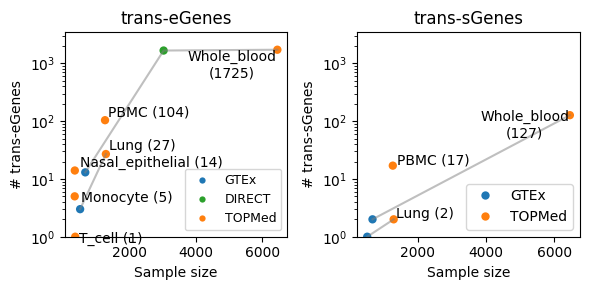

In [11]:
YMAX = trans_counts.n_trans.max() * 2
SHARED_TISSUES = ['Whole_blood', 'Lung']

palette = {'GTEx': mpl.cm.get_cmap('tab10').colors[0], 'TOPMed': mpl.cm.get_cmap('tab10').colors[1], 'DIRECT': mpl.cm.get_cmap('tab10').colors[2]}

fig, axs = plt.subplots(ncols=2, figsize=(3*2, 3))

ax = axs[0]
df = trans_counts[trans_counts.modality=='eQTL']
sns.scatterplot(x='n_samples', y='n_trans', hue='cohort', ax=ax, data=df, edgecolor='None', palette=palette)
for tissue in SHARED_TISSUES:
    sns.lineplot(x='n_samples', y='n_trans', ax=ax, data=df[df.tissue==tissue], color='grey', alpha=0.5)
ax.set_yscale('log')
ax.set_ylabel('# trans-eGenes')
ax.set_xlabel('Sample size')
ax.legend(prop={'size': 9}, markerscale=0.75)
txts = [ax.text(x=n_samples, y=n_trans, s=label) for n_samples, n_trans, label in zip(df.n_samples, df.n_trans, df.label) if label !='']
adjust_text(txts, ax=ax, x=df.n_samples.to_list(), y=df.n_trans.to_list())
ax.set_title('trans-eGenes')
ax.set_ylim(1, YMAX)

ax = axs[1]
df = trans_counts[(trans_counts.modality=='sQTL') & (trans_counts.n_trans>0)]
sns.scatterplot(x='n_samples', y='n_trans', hue='cohort', ax=ax, data=df, edgecolor='None', palette=palette)
for tissue in SHARED_TISSUES:
    sns.lineplot(x='n_samples', y='n_trans', ax=ax, data=df[df.tissue==tissue], color='grey', alpha=0.5)
ax.set_yscale('log')
ax.set_ylabel('# trans-sGenes')
ax.set_xlabel('Sample size')
ax.legend(loc='lower right').set_title('')
ax.set_title('')
txts = [ax.text(x=n_samples, y=n_trans, s=label) for n_samples, n_trans, label in zip(df.n_samples, df.n_trans, df.label) if label !='']
adjust_text(txts, ax=ax, x=df.n_samples.to_list(), y=df.n_trans.to_list())
ax.set_title('trans-sGenes')
ax.set_ylim(1, YMAX)

fig.tight_layout()
fig.savefig(f'{PREFIX}png', dpi=300, facecolor='white')